# imports

In [64]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image


In [65]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# load data

In [66]:
df4 = pd.read_csv('data/df3.csv',low_memory=False)

In [67]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,season
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,2015,7,31,31,2015-07,2008-09-01,84,2015-07-27,0,summer
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,2015,7,31,31,2015-07,2007-11-01,94,2010-03-22,279,summer
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,2015,7,31,31,2015-07,2006-12-01,105,2011-03-28,226,summer
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,2015,7,31,31,2015-07,2009-09-01,71,2015-07-27,0,summer
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,2015,7,31,31,2015-07,2015-04-01,4,2015-07-27,0,summer


In [68]:
df4.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month      int64
competition_open_since_year       int64
promo2                            int64
promo2_since_week                 int64
promo2_since_year                 int64
is_promo                          int64
year                              int64
month                             int64
day                               int64
week_of_year                      int64
year_week                        object
competition_since                object
competition_time_month            int64
promo_since                      object
promo_time_week                   int64


In [69]:
df4['date'] = pd.to_datetime(df4['date'])
df4['competition_since'] = pd.to_datetime(df4['competition_since'])
df4['promo_since'] = pd.to_datetime(df4['promo_since'])

# Exploratory data analysis

In [70]:
num_attribures = df4.select_dtypes(include=['int64','int32','float64'])
cat_attribures = df4.select_dtypes(exclude=['int64','int32','float64','datetime64[ns]'])

## Univariate analysis

### target variable

C:\Users\Lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

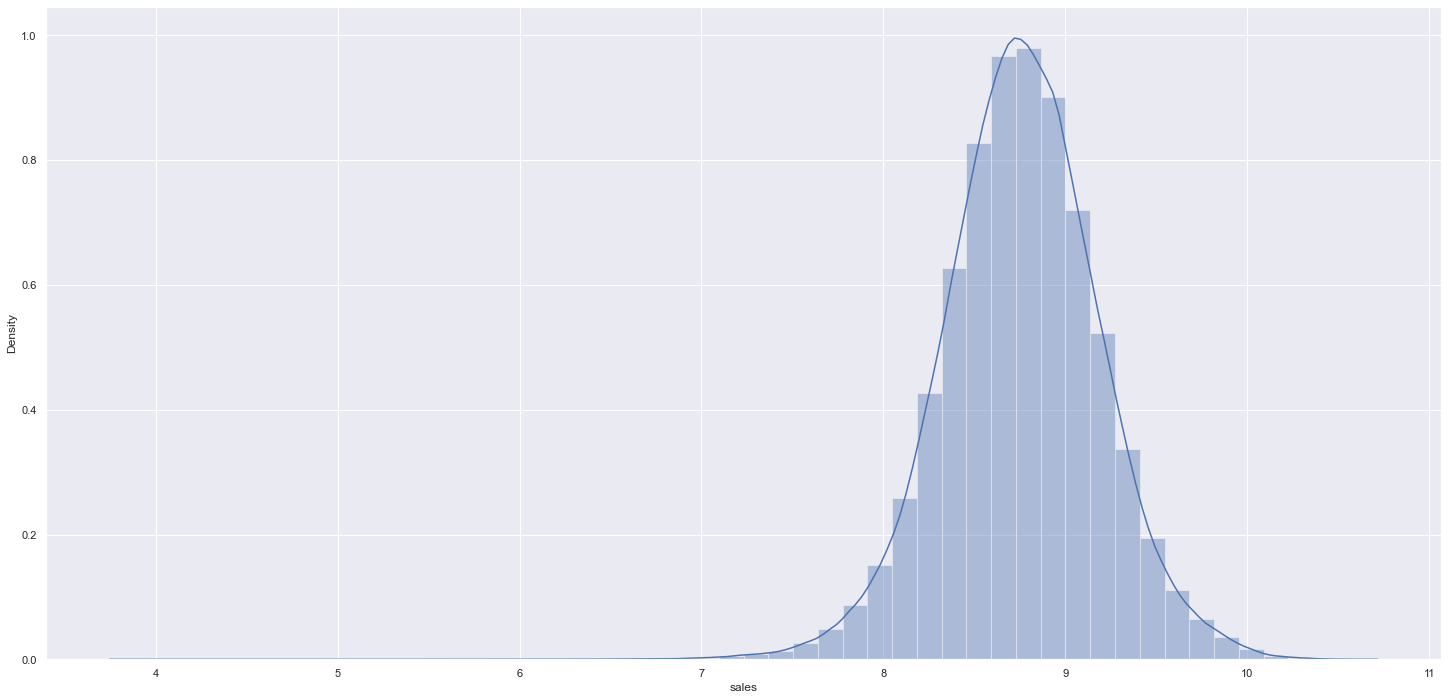

In [71]:
sns.distplot(np.log(df4['sales']))

### Numerical variables

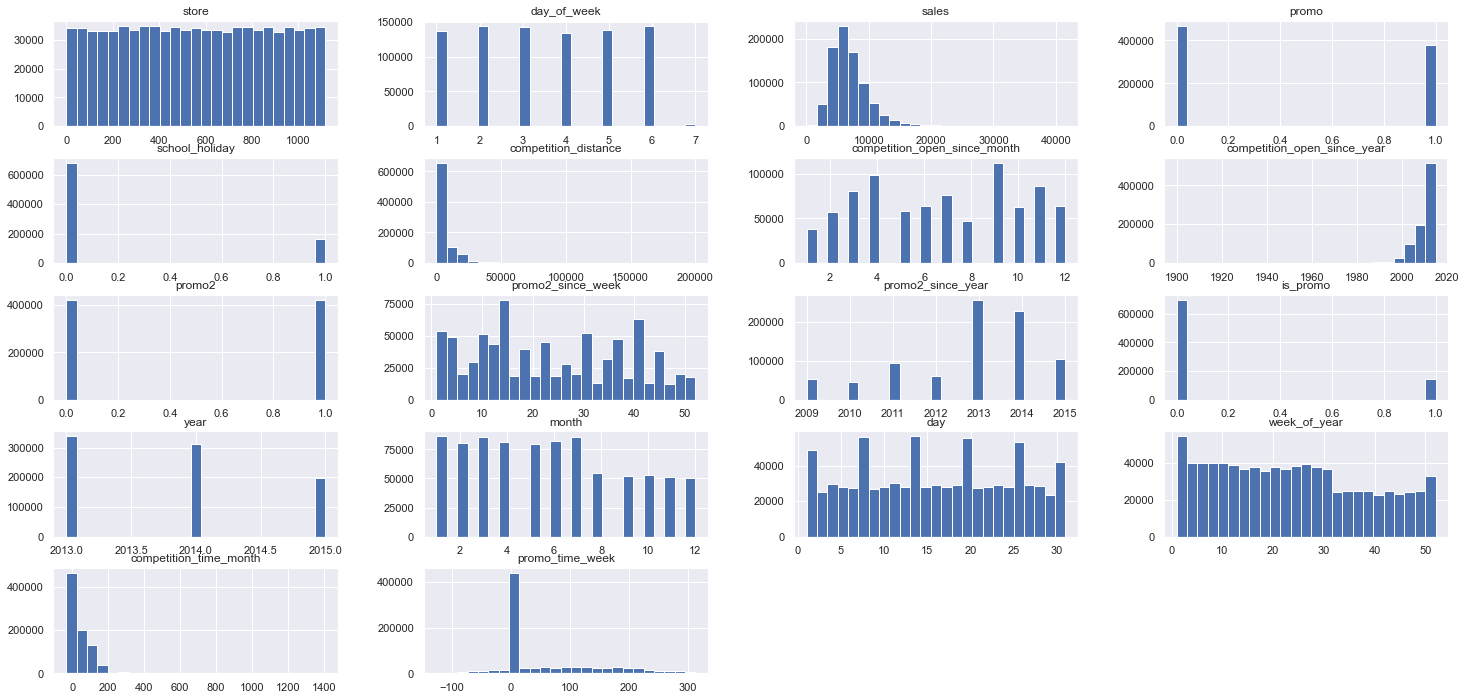

In [72]:
num_attribures.hist(bins=25);

In [85]:
df4['assortment']

0            basic
1            basic
2            basic
3         extended
4            basic
            ...   
844333       basic
844334       extra
844335       extra
844336       extra
844337       extra
Name: assortment, Length: 844338, dtype: object

### Categorical Variable

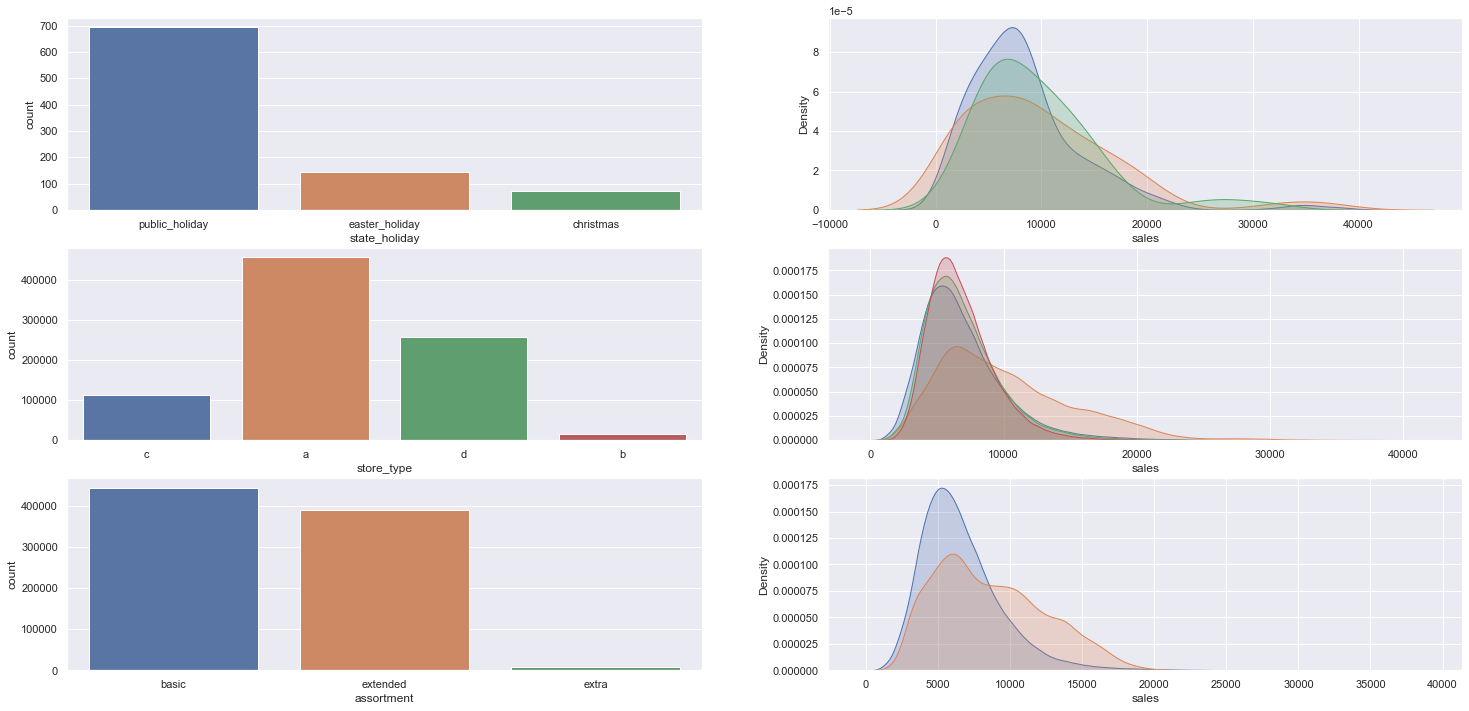

In [88]:
plt.subplot(3,2,1)
aux = df4[df4['state_holiday']!='regular_day']
sns.countplot(x='state_holiday',data=aux);

plt.subplot(3,2,2)
aux =df4[df4['state_holiday']=='public_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='easter_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='christmas']['sales']
sns.kdeplot(aux,shade=True)


plt.subplot(3,2,3)
sns.countplot(x='store_type',data=df4);

plt.subplot(3,2,4)
aux =df4[df4['store_type']=='a']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='b']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='c']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='d']['sales']
sns.kdeplot(aux,shade=True)

plt.subplot(3,2,5)
sns.countplot(x='assortment',data=df4);

plt.subplot(3,2,6)
aux =df4[df4['assortment']=='basic']['sales']
sns.kdeplot(aux,shade=True,label='basic')
aux =df4[df4['assortment']=='extra']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['assortment']=='extended']['sales']